### Decision Tree Classifier with implementation of post prunning and pre prunning 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
from sklearn.datasets import load_iris

In [17]:
dataset=load_iris()

In [22]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [19]:
# other way to load dataset
import seaborn as sns 
df=sns.load_dataset('iris')

In [23]:
dataset.target  # target value is in numerical format 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### The dataset given by sklearn has dependent feature in the numerical format which is useful for model training and 
### the dataset given by seaborn contain all the feature in form of dataframe.
So we will use sklearn dataset for dependent variable and seaborn dataset for independent variable

In [24]:
# independent and dependent features 
x=df.iloc[:,:-1]
y=dataset.target

### In case of decision tree we can perform the EDA as per our wish but do not perfrom any standard scaling and the feature selection
because in this we want to split our nodes and feature selection and standard scaling will not be useful for us. It will only 
increase our time complexity.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [28]:
# import decision tree 
from sklearn.tree import DecisionTreeClassifier

In [29]:
# object
classifier=DecisionTreeClassifier()   # by default criterion: gini

In [30]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
# for small dataset we can also use the parameter criterion: entropy
classifier=DecisionTreeClassifier(criterion='entropy')

In [32]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.4444444444444444, 0.9285714285714286, 'x[2] <= 2.45\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3333333333333333, 0.7857142857142857, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5555555555555556, 0.7857142857142857, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.3333333333333333, 0.6428571428571429, 'x[2] <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.2222222222222222, 0.5, 'x[3] <= 1.45\nentropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.1111111111111111, 0.35714285714285715, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(0.3333333333333333, 0.35714285714285715, 'x[1] <= 2.6\nentropy = 0.722\nsamples = 10\nvalue = [0, 8, 2]'),
 Text(0.2222222222222222, 0.21428571428571427, 'x[0] <= 6.15\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.1111111111111111, 0.07142857142857142, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.3333333333333333, 0.0714285714

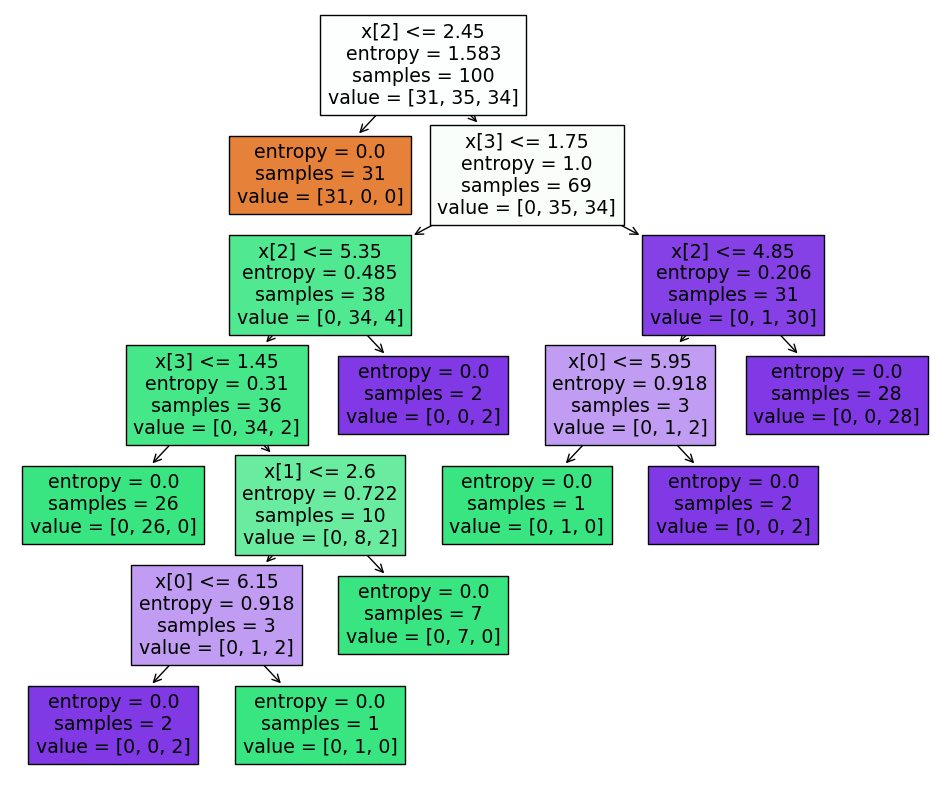

In [33]:
# display the decision tree
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)  # filled : it will fill some colour into the nodes 

### Observe the decision tree

In [35]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0


In [ ]:
# x[0]=sepal_length x[1]=sepal_width x[2]=petal_length x[3]=petal_width  
# the root node is the 2nd index column (its information gain is highest from all the features)

### Post prunning 
Decision tree is constructed, now find out from which level we dont need the further split of the tree

### we observe after the level 2 the further split is not required as one of the feature is in major and the second category is minor. So major category will get predicted more. We can cut off the tree after level 2 to reduce time complexity.
It will help in preventing the overfitting condition as we will cut tree to make a generalise data.

In [36]:
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=2) # till level 2

In [37]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.206\nsamples = 31\nvalue = [0, 1, 30]')]

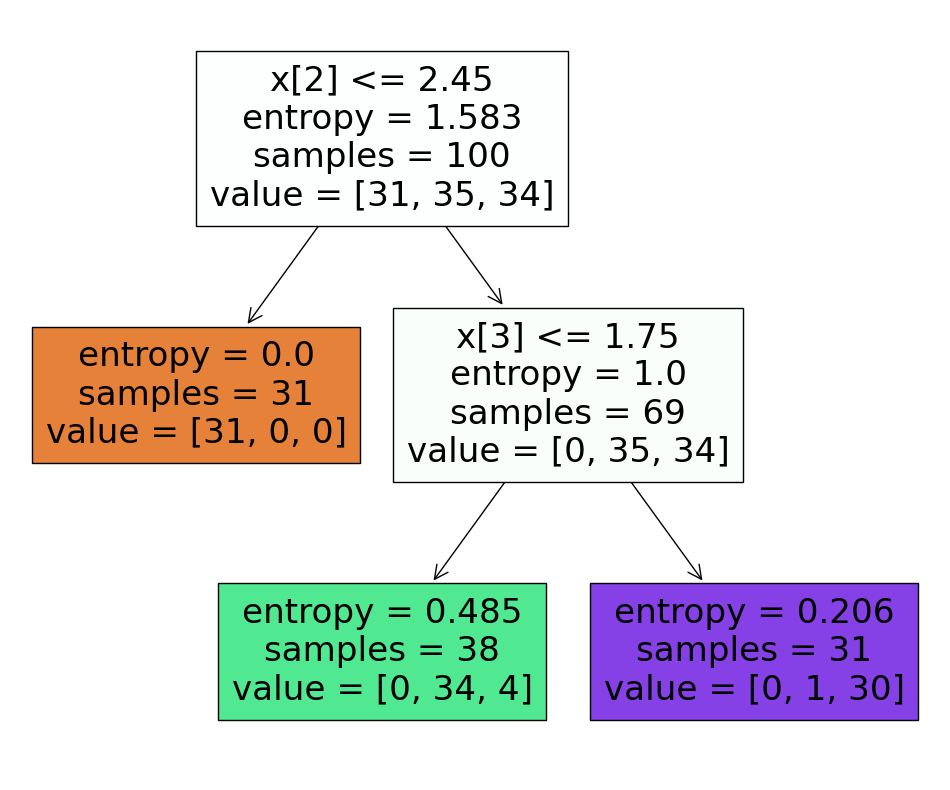

In [38]:
# display the decision tree
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)  # filled : it will fill some colour into the nodes 

In [40]:
#orediction
y_pred=classifier.predict(x_test)

In [41]:
# check accuracy classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [43]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))  # 98% accuracy

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### Decision tree  hyperparameter tunning and pretunning on huge dataset

In [46]:
# there are a lot of warning comes during hyperparameter 
import warnings 
warnings.filterwarnings('ignore') 

In [47]:
# hyperparameter is for selecting what is right combination for the training 
# first we have to create dictionery fo parameter
parameters={'criterion':['gini','entropy','log_loss'],
            'splitter':['best','random'],
            'max_depth':[1,2,3,4,5],
            'max_features':['auto','sqrt','log2']
}

In [48]:
from sklearn.model_selection import GridSearchCV

In [52]:
classifier=DecisionTreeClassifier()
clf=GridSearchCV(classifier,param_grid=parameters,cv=5,scoring='accuracy')

In [53]:
clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [54]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [55]:
clf.best_score_

0.9800000000000001

In [57]:
# now either train the classifier with all above parameter or we use this clf varible directly for prediction
y_pred=clf.predict(x_test) 

In [58]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))  # 98% accuracy

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

